# Assignment 3: Trump, Twitter, and Text

Due Date: 11:59pm Monday, February 14, 2022   

#### Welcome to the third homework assignment of Data 200! In this assignment, we will work with Twitter data in order to analyze Donald Trump's tweets.

#### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you write your solutions indivi
dually. If you do discuss the assignments with others please include their names below.

**Collaborators: Marcus Rilling, Kayleigh Habib**

In [51]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
import seaborn as sns
from IPython.display import display, Latex, Markdown
import re

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

### Before we start

All data is made from real-world phenomena, be it the movement of the planets, animal behavior, or human bodies and activities. Working with data always has a bearing back on how human beings know and act in the world. The dataset that you're about to work with in this homework consists of a compilation of President Trump's Tweets. It's important to acknowledge that these Tweets are more than just data -- they're the means by which the President expresses his opinions, performs public and foreign policy, and shapes the lives of people in the US and all over the world. More fundamentally, these Tweets are a powerful form of speech that is particularly significant on the eve of the 2020 US Presidential Election. We recognize that working with this data now, even in the context of a technical exercise, is not a neutral activity and may create difficult feelings in students. We encourage you to observe what you may be experiencing and invite you to consider these dimensions of data science work alongside your technical lessons and we're glad to discuss these issues together in section.

### Disclaimer about sns.distplot()
This homework was designed for a slightly older version of seaborn, which does not support the new displot method. Instead, in this homework we will heavily rely on distplot (with a t). As you may have noticed in lab 5, use of the distplot function triggers a deprecation warning to notify the user that they should replace all deprecated functions with the updated version. Generally, warnings should not be suppressed but we will do so in this assignment to avoid cluttering.

See the seaborn documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [52]:
# Run this cell to suppress all DeprecationWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [53]:
# Import the dataset
tweets = pd.read_csv("tweets_01-08-2021.csv")
tweets.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created our economic problems.,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f
1,1234653427789070336,"I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! #KAG2020 https://t.co/dNJZfRsl9y",f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f
3,1304875170860015617,"The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp; with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballot...",f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f
4,1218159531554897920,RT @MZHemingway: Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those articles and tho…,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f


### Question 0
    
There are many ways we could choose to read the President’s tweets. Why might someone be interested in doing data analysis on the President’s tweets? Name a kind of person or institution which might be interested in this kind of analysis. Then, give two reasons why a data analysis of the President's tweets might be interesting or useful for them. Answer in 2-3 sentences.

**The stock market is impacted by the economic conditions of the government, thus they would be interested to see what the president was tweeting in order to predict actions he could take. By predicting the presidents actions, they could buy or sell stocks that they believe the President's tweets may impact. The president's media presence also has a large impact on the consumers and a positive or negative tweet towards a product or industry could impact the markets**

### Question 1

Construct a DataFrame called trump containing data from all the tweets stored in _text_. The index of the DataFrame should be the ID of each tweet (looks something like 907698529606541312). It should have these columns:

*date: The time the tweet was created encoded as a datetime object.*
*device: The source device of the tweet.*
*text: The text of the tweet.*
*retweet: The retweet count of the tweet.*

**Finally, the resulting DataFrame should be sorted by the index.**

Hint: You might want to explicitly specify the columns and indices using pd.DataFrame().

In [69]:
trump = pd.DataFrame(data=tweets, columns=["id","date","device","text","retweets"]).sort_values(by="id")
trump["date"]=pd.to_datetime(trump["date"])
trump["text"] = pd.Series(trump["text"],dtype = "string")
trump.set_index("id", inplace = True)
trump.head()

,date,device,text,retweets
id,,,,
1698308935,2009-05-04 18:54:25,Twitter Web Client,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,519
1701461182,2009-05-05 01:00:10,Twitter Web Client,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,34
1737479987,2009-05-08 13:38:08,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,15
1741160716,2009-05-08 20:40:15,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,11
1773561338,2009-05-12 14:07:28,Twitter Web Client,"""""""My persona will never be that of a wallflower - I’d rather build walls than cling to them"""" --Donald J. Trump""",1321


### Question 2 Tweet source analysis 

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [70]:
trump['device'].unique()

array(['Twitter Web Client', 'TweetDeck', 'TwitLonger Beta', 'Facebook',
       'Twitter for iPhone', 'Twitter Web App', 'Twitter for Android',
       'Instagram', 'Twitlonger', 'Vine - Make a Scene',
       'Twitter for Websites', 'Twitter for BlackBerry',
       'Neatly For BlackBerry 10', 'Periscope', 'Twitter QandA',
       'Twitter Mirror for iPad', 'Twitter Ads', 'Twitter for iPad',
       'Twitter Media Studio', 'Media Studio'], dtype=object)

In the following plot, we see that there are two device types that are more commonly used than others.

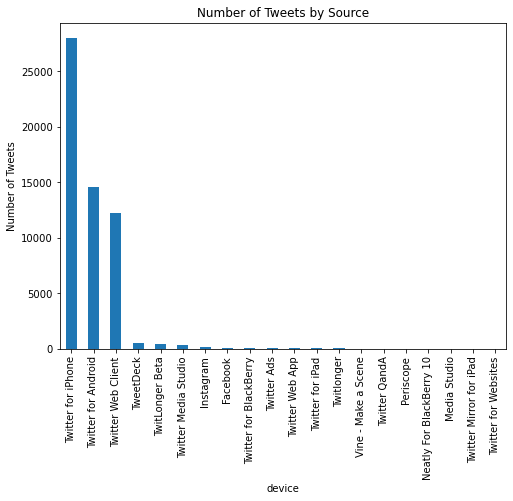

In [71]:
plt.figure(figsize=(8, 6))
trump['device'].value_counts().plot(kind="bar")
plt.xlabel('device')
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

#### Question 2 (a) 

Let's extrat the rows with the two major devices "Twitter for iPhone" and "Twitter for Android", and then replace "Twitter for iPhone" by "iPhone" and "Twitteer for Android" by "Android". 

In [72]:
trump_device = trump.loc[(trump.device == "Twitter for iPhone") | (trump.device == "Twitter for Android")]
trump_device["device"] = trump_device["device"].replace({"Twitter for iPhone":"iPhone", "Twitter for Android":"Android"})
trump_device.head()

/tmp/ipykernel_65/560626273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_device["device"] = trump_device["device"].replace({"Twitter for iPhone":"iPhone", "Twitter for Android":"Android"})


,date,device,text,retweets
id,,,,
278308122500661248,2012-12-11 01:20:01,iPhone,"Good luck to Bob Kraft, Tom Brady, and Coach Bill Belichick tonight.",629
298972696438521857,2013-02-06 01:53:40,Android,Thanks @SherriEShepherd 4 your nice comments today on The View. U were terrific!,26
302270661387231232,2013-02-15 04:18:36,Android,@rosscooker thanks,6
302358232716939265,2013-02-15 10:06:34,Android,@RuRu_89 thanks,4
302925403595612160,2013-02-16 23:40:18,Android,Great going.,127


#### Question 2 (b) 

parse the date into six new columns representing "year", "month", "day", "hour", "minute" and "second". 

In [73]:
trump_device["year"] = pd.DatetimeIndex(trump_device["date"]).year
trump_device["month"] = pd.DatetimeIndex(trump_device["date"]).month
trump_device["day"] = pd.DatetimeIndex(trump_device["date"]).day
trump_device["hour"] = pd.DatetimeIndex(trump_device["date"]).hour
trump_device["minute"] = pd.DatetimeIndex(trump_device["date"]).minute
trump_device["second"] = pd.DatetimeIndex(trump_device["date"]).second
trump_device=trump_device.drop("date",axis=1)
trump_device.head()

/tmp/ipykernel_65/1709783570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_device["year"] = pd.DatetimeIndex(trump_device["date"]).year
/tmp/ipykernel_65/1709783570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_device["month"] = pd.DatetimeIndex(trump_device["date"]).month
/tmp/ipykernel_65/1709783570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,device,text,retweets,year,month,day,hour,minute,second
id,,,,,,,,,
278308122500661248,iPhone,"Good luck to Bob Kraft, Tom Brady, and Coach Bill Belichick tonight.",629,2012,12,11,1,20,1
298972696438521857,Android,Thanks @SherriEShepherd 4 your nice comments today on The View. U were terrific!,26,2013,2,6,1,53,40
302270661387231232,Android,@rosscooker thanks,6,2013,2,15,4,18,36
302358232716939265,Android,@RuRu_89 thanks,4,2013,2,15,10,6,34
302925403595612160,Android,Great going.,127,2013,2,16,23,40,18


#### Question 2 (c) 

Overlay the distributions of Trump's 2 most frequently used web technologies over the years. 

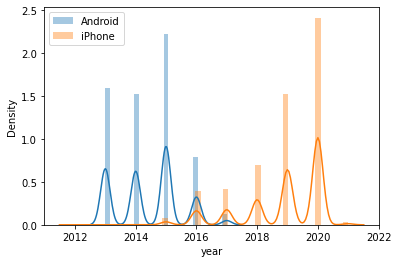

In [113]:
android = trump_device[trump_device['device'] == 'Android']
iphone = trump_device[trump_device['device'] == "iPhone"]

sns.distplot(android['year'], label = 'Android')
sns.distplot(iphone['year'], label = 'iPhone')
plt.legend()
plt.show()

#### Question 2 (d) 

Please commeent on the pattern(s) from the plot in Question 2 (c). 

**My first observation is that the data is not continuous which makes the graph look awkward. The year variable must be an integer which results in gaps between integer values. In terms of the data, most if not all, of the tweets from before 2016 were sent from an Android device and after 2016, all of the tweets are from iPhone devices. This evidence would allow someone viewing the data to assume that trump switched from an Android cellular device to an iPhone cellular device in 2016.**

#### Question 2 (e) 

Is there a difference between Trump's tweet behavior across these devices? Draw the distribution over hours of the day that Trump tweets on each device for the 2 most commonly used devices. 

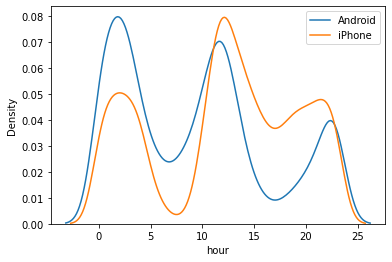

In [75]:
sns.distplot(android['hour'], label = 'Android', hist=False)
sns.distplot(iphone['hour'], label = 'iPhone', hist=False)
plt.legend()
plt.show()

#### Question 2 (f) 

According to this [Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. Create a figure similar to your figure from question 2(e), but this time, only use tweets that were tweeted before 2017.

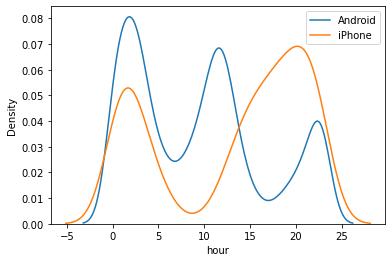

In [76]:
trump_device[trump_device['device'] == 'Android']
iphone17 = iphone[iphone["year"] < 2017]
android17 = android[android["year"] < 2017]
sns.distplot(android17['hour'], label = 'Android', hist=False)
sns.distplot(iphone17['hour'], label = 'iPhone', hist=False)
plt.legend()
plt.show()


#### Question 2 (g) 

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. Does your figure give support to this theory? What kinds of additional analysis could help support or reject this claim?

**The figure above shows a dip in activity of the android devices between 1am and 10am and 12pm and 10pm. This pattern reinforces that Trump used his android device for personal tweets because between 1am and 10 am he would have been asleep, and after waking up and being on his phone for a period of time, he would put it away and do the work which he is required to do for his campaign/corporation (Hence the dip between 12pm and 10pm). Analysis of his retweet behaviours could further support this theory.**

## Part II Sentiment Analysis 

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [77]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



As you can see, the lexicon contains emojis too! Each row contains a word and the polarity of that word, measuring how positive or negative the word is.

#### Question 3
The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:
“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately.

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk.

#### Question 3 (a) 

Please score the sentiment of one of the following words:

- police
- order
- Democrat
- Republican
- gun
- dog
- technology
- TikTok
- security
- face-mask
- science
- climate change
- vaccine

What score did you give it and why? Can you think of a situation in which this word would carry the opposite sentiment to the one you’ve just assigned?

**I would give the word 'gun' a score of -0.9 since guns are generally affiliated with violence and tradegy with are extremely negative. The reason it is not a -1 is because guns are also used in the context of protection.**


#### Question 3 (b) 

VADER aggregates the sentiment of words in order to determine the overall sentiment of a sentence, and further aggregates sentences to assign just one aggregated score to a whole tweet or collection of tweets. This is a complex process and if you'd like to learn more about how VADER aggregates sentiment, here is the info at this link.

Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? What features of human speech might VADER misrepresent or fail to capture?

**In general, punctuation can have a tremendous effect on the sentiment of a text. For example, exclamation marks can increase the factor of positivity/negativity. Furthermore, human interaction is heavly non-verbal. Many factors such as tone, eye contact, and posture affect the emotions that are created through speech. In the context of this data, there are some tweets which contain links or hashtags. This can make it difficult to guage the tweet's sentiment**

####  Question 3 (c) 
Read **vader_lexicon.txt** into a DataFrame called sent. The index of the DataFrame should be the words in the lexicon. sent should have one column named polarity, storing the polarity of each word.

Hint: The pd.read_csv function may help here. Since the file is tab-separated, be sure to set sep='\t' in your call to pd.read_csv.

In [78]:
sent = pd.read_csv("vader_lexicon.txt", sep='\t',header = None)[[0,1]].rename(columns = {0 : 'word',1: 'polarity'})
sent.set_index('word',inplace = True)
sent.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


Now, let's get rid of punctuation since it will cause us to fail to match words. Create a new column called **no_punc** in the trump DataFrame to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regex for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)


In [79]:
# Save your regex in punct_re
punct_re = r'[^\w\s]+'
trump['no_punc'] = trump['text'].str.lower().str.replace(punct_re, ' ')

#### Question 3 (d) 

Now, let's convert the tweets into what's called a tidy format to make the sentiments easier to calculate. Use the no_punc column of trump to create a table called tidy_format. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. 

It has two columns:

1. num: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. word: The individual words of each tweet.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the trump DataFrame, albeit using some rather advanced Pandas hacking.

- **Hint 1:** Try looking at the expand argument to pandas' str.split.
- **Hint 2:** Try looking at the stack() method.
- **Hint 3:** Try looking at the level parameter of the reset_index method.    
    

In [81]:
tidy_format = pd.DataFrame(data = trump, columns = ["no_punc"])

tidy_format = (tidy_format['no_punc'].str.split(expand = True).stack(dropna = True).reset_index(name = "word")
    .rename(columns={"level_1": "num"})
              )

tidy_format.set_index("id",inplace = True)
tidy_format.head(5)

,num,word
id,,
1698308935,0,be
1698308935,1,sure
1698308935,2,to
1698308935,3,tune
1698308935,4,in


#### Question 3 (e) 

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table.Add a polarity column to the trump table. The polarity column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hints:**
- You will need to merge the tidy_format and sent tables and group the final answer.
- If certain words are not found in the sent table, set their polarities to 0.

In [95]:
tidy_format2 = tidy_format.reset_index().merge(sent, how = "left", on = "word").set_index("id")
tidy_format2 = tidy_format2.groupby(by = ["id"]).sum()
tidy_format2
tidy_format2["polarity"] = tidy_format2["polarity"].fillna(0)
trump['polarity'] = tidy_format2["polarity"]
trump

,date,device,text,retweets,no_punc,polarity
id,,,,,,
1698308935,2009-05-04 18:54:25,Twitter Web Client,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!,519,be sure to tune in and watch donald trump on late night with david letterman as he presents the top ten list tonight,2.1
1701461182,2009-05-05 01:00:10,Twitter Web Client,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!,34,donald trump will be appearing on the view tomorrow morning to discuss celebrity apprentice and his new book think like a champion,4.4
1737479987,2009-05-08 13:38:08,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!,15,donald trump reads top ten financial tips on late show with david letterman http tinyurl com ooafwn very funny,2.7
1741160716,2009-05-08 20:40:15,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e,11,new blog post celebrity apprentice finale and lessons learned along the way http tinyurl com qlux5e,0.0
1773561338,2009-05-12 14:07:28,Twitter Web Client,"""""""My persona will never be that of a wallflower - I’d rather build walls than cling to them"""" --Donald J. Trump""",1321,my persona will never be that of a wallflower i d rather build walls than cling to them donald j trump,0.0
...,...,...,...,...,...,...
1346928882595885058,2021-01-06 21:17:24,Twitter for iPhone,https://t.co/Pm2PKV0Fp3,0,https t co pm2pkv0fp3,0.0
1346954970910707712,2021-01-06 23:01:04,Twitter for iPhone,These are the things and events that happen when a sacred landslide election victory is so unceremoniously &amp; viciously stripped away from great patriots who have been badly &amp; unfairly treated for so long. Go home with love &amp; in peace. Remember this day forever!,0,these are the things and events that happen when a sacred landslide election victory is so unceremoniously amp viciously stripped away from great patriots who have been badly amp unfairly treated for so long go home with love amp in peace remember this day forever,5.4
1347334804052844550,2021-01-08 00:10:24,Twitter Media Studio,https://t.co/csX07ZVWGe,154877,https t co csx07zvwge,0.0


Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [96]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   Colin Powell was a pathetic interview today on Fake News CNN. In his time, he was weak &amp; gave away everything to everybody - so bad for the USA. Also got the “weapons of mass destruction” totally wrong, and you know what that mistake cost us? Sad! Only negative questions asked.

   According to press reports, Iran may be planning an assassination, or other attack, against the United States in retaliation for the killing of terrorist leader Soleimani, which was carried out for his planning a future attack, murdering U.S. Troops, and the death &amp; suffering...

   The Trump portrait of an unsustainable Border Crisis is dead on. “In the last two years, ICE officers made 266,000 arrests of aliens with Criminal Records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp, 4000 violent killings.” America’s Southern....

   It is outrageous that Poisonous Synthetic Heroin Fentanyl comes pouring into the U.S. Postal System from China

In [97]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   Congratulations to Patrick Reed on his great and courageous MASTERS win! When Patrick had his amazing win at Doral 5 years ago, people saw his great talent, and a bright future ahead. Now he is the Masters Champion!

   Today, it was my great honor to proudly accept the endorsement of the @NYCPBA! I have deeply and profoundly admired the brave men and women of the #NYPD for my entire life. New York’s Finest are truly the best of the best — I will NEVER let you down! #MAGA https://t.co/o1l5kAx34v

   95% Approval Rating in the Republican Party. Thank you! 191 Federal Judges (a record), and two Supreme Court Justices, approved. Best Economy &amp; Employment Numbers EVER. Thank you to our great New, Smart and Nimble REPUBLICAN PARTY. Join now, it’s where people want to be!

   Good luck and best wishes to my dear friend, the wonderful and very talented Joan Rivers!  Winner of Celebrity Apprentice, amazing woman.

   It was great to be back in North Carolina with 

#### Question 3 (f)

Read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores?

**Yes. The positive tweets are filled with warm and positive words and messages and the negative tweets have many hostile or sorrowful words and messages.**

#### Question 4 

Now, let's try looking at the distributions of sentiments for tweets containing certain keywords.

#### Question 4 (a) 

In the cell below, create a single plot showing both the distribution of tweet sentiments for tweets containing *nytimes*, as well as the distribution of tweet sentiments for tweets containing *fox*.

Be sure to label your axes and provide a title and legend. Be sure to use different colors for fox and nytimes.

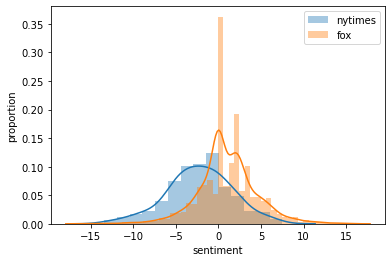

In [108]:
sns.distplot(trump[trump["no_punc"].str.contains("nytimes")]["polarity"], label = "nytimes")
sns.distplot(trump[trump["no_punc"].str.contains("fox")]["polarity"], label = 'fox')
plt.ylabel("proportion")
plt.xlabel("sentiment")
plt.legend()
plt.show()

#### Question 4 (b) 

Comment on what you observe in the plot above. Can you find another pair of keywords that lead to interesting plots? Describe what makes the plots interesting. 

**Tweets containing fox had generally more positive sentiment and tweets containing nytimes were more negative. This makes sense since fox has a conservative view and would post messages that Donald Trump would be in agreement with but the NY times are liberal and therefore had the opposite effect. Another pair of keywords that creates an interesing plot is democrat and replublican, for obvious reasons. Whichever trump is affiliated with will have a better sentiment**

#### Question 5 

Now, let's see whether there's a difference in sentiment for tweets with hashtags and those without.

#### Question 5 (a) 

First, we'll need to write some regex that can detect whether a tweet contains a hashtag or a link. We say that:

- A tweet is a retweet if it has the string 'rt' anywhere in the tweet if it is preceeded and followed by a non-word character (the start and end of the string count as non-word characters).
- A tweet has a hashtag if it has the character '#' anywhere in the tweet followed by a letter.
- A tweet contains a link or a picture if it has http anywhere in the tweet
(You can check out Trump's Twitter for why these criteria are true).

In the cell below, assign rt_re to a regex pattern that identifies retweets and hash_link_re to a regex pattern that identifies tweets with hashtags or links.

**Hints:**
- Be sure to precede your regex pattern with r to make it a raw string (Ex: r'pattern'). To find out more, you can read the first paragraph of the documentation.
- You may find using regex word boundaries helpful for one of your patterns.

In [101]:
rt_re = "^rt | rt$ | ^RT | RT$ | ^Rt | Rt$"
hash_link_re = "#[a-zA-z] | http"

#### Question 5 (b) 

Let's see whether there's a difference in sentiments for tweets with hashtags/links and those without.

Note: You will get a UserWarning error when running the below cell. For the purpose of this homework, you can ignore it.

Run the cell below to see a distribution of tweet sentiments based on whether a tweet contains a hashtag or link.

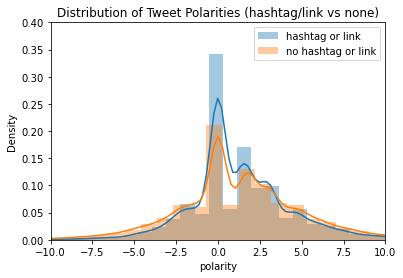

In [102]:
sns.distplot(trump[trump['text'].str.contains(hash_link_re)]['polarity'],label='hashtag or link');
sns.distplot(trump[~trump['text'].str.contains(hash_link_re)]['polarity'],label='no hashtag or link');
plt.xlim(-10, 10);
plt.ylim(0, 0.4);
plt.title('Distribution of Tweet Polarities (hashtag/link vs none)');
plt.legend();

What do you notice about the distributions? Answer in 1-2 sentences.

**Overall, the distribution is very similar. Both has similar shaped density curves. No hashtag or link distribution is more affected by outliers. The hashtag or link distribution shows that there are a lot of tweets that contain a hashtag or a link that have a sentiment of 0. This makes sense logically because hashtags are often many words combined into a single hashtag resulting in an unfamiliar word for VADER which is given a 0 and link are very long and contain various digits and characters also resulting in an unfamiliar word and given a 0. **

## Congratulations! You have finished Assignment 3! 